# Testbenches for the AC Analysis

In [1]:
import sys
sys.path.append("..")

import logging
import numpy as np
import matplotlib.pyplot as plt

from Xyce import getXyceData
from yalrf import YalRF

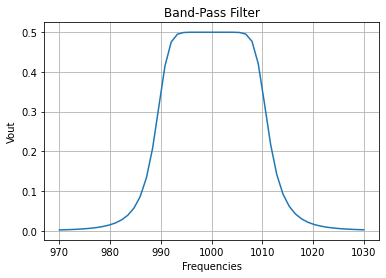

In [2]:
y = YalRF("Band-Pass Filter")

y.add_vac('V1', 'n1', 'gnd', 1)

y.add_resistor('R1', 'n1', 'n2', 50.)
y.add_inductor('L1', 'n2', 'n3', 0.245894)
y.add_capacitor('C1', 'n3', 'n4', 1.03013e-07)
y.add_inductor('L2', 'n4', 'gnd', 9.83652e-05)
y.add_capacitor('C2', 'n4', 'gnd', 0.000257513)
y.add_inductor('L3', 'n4', 'n5', 0.795775)
y.add_capacitor('C3', 'n5', 'n6', 3.1831e-08)
y.add_inductor('L4', 'n6', 'gnd', 9.83652e-05)
y.add_capacitor('C4', 'n6', 'gnd', 0.000257513)
y.add_capacitor('C5', 'n7', 'n8', 1.03013e-07)
y.add_inductor('L5', 'n6', 'n7', 0.245894)
y.add_resistor('R2', 'n8', 'gnd', 50.)

ac = y.add_ac_analysis('AC1', start=970, stop=1030, numpts=50)

sol = y.run('AC1')

freq = y.get_freqs('AC1')
vout = y.get_voltage('AC1', 'n8')

plt.figure(1)
plt.plot(freq, np.abs(vout))
plt.grid()
plt.title('Band-Pass Filter')
plt.xlabel('Frequencies')
plt.ylabel('Vout')
plt.show()

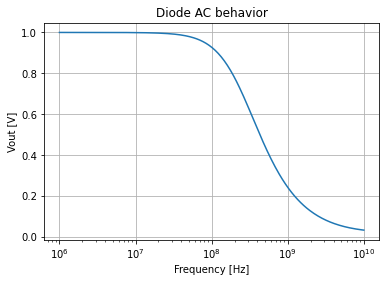

In [3]:
y = YalRF("Diode AC behavior")

y.add_vac('V1', 'n1', 'gnd', 1)
y.add_resistor('R1', 'n1', 'n2', 50.)
y.add_inductor('L1', 'n2', 'n3', 1e-3)
y.add_vdc('V2', 'n3', 'gnd', 0.75)

d1 = y.add_diode('D1', 'n2', 'gnd')
d1.options['Is'] = 1e-15
d1.options['Cj0'] = 10e-12
d1.options['Rs'] = 1
d1.options['Area'] = 1

y.add_ac_analysis('AC1', start=1e6, stop=10e9, numpts=300, sweeptype='logarithm')
y.run('AC1')

freq = y.get_freqs('AC1')
vout = y.get_voltage('AC1', 'n2')

plt.figure(1)
plt.semilogx(freq, np.abs(vout))
plt.grid()
plt.title('Diode AC behavior')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Vout [V]')
plt.show()

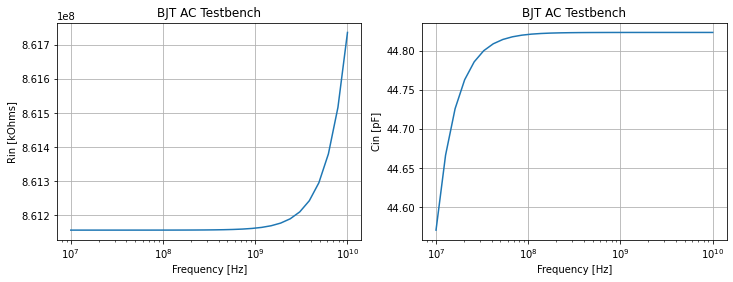

In [6]:
y = YalRF('BJT AC Testbench')

v1 = y.add_vdc('V1', 'nc', 'gnd', 1)

c1 = y.add_capacitor('C1', 'ny', 'nb', 1e-6)
i1 = y.add_iac('I1', 'ny', 'gnd', 1)

l1 = y.add_inductor('L1', 'nx', 'nb', 1e-3)
v2 = y.add_vdc('V2', 'nx', 'gnd', 0.75)

q1 = y.add_bjt('Q1', 'nb', 'nc', 'gnd')
q1.options['Is'] = 8.11e-14
q1.options['Nf'] = 1
q1.options['Nr'] = 1
q1.options['Ikf'] = 0.5
q1.options['Ikr'] = 0.225
q1.options['Vaf'] = 113
q1.options['Var'] = 24
q1.options['Ise'] = 1.06e-11
q1.options['Ne'] = 2
q1.options['Isc'] = 0
q1.options['Nc'] = 2
q1.options['Bf'] = 205
q1.options['Br'] = 4

q1.options['Cje'] = 2.95e-11
q1.options['Cjc'] = 1.52e-11
q1.options['Cjs'] = 0.

dc1 = y.add_dc_analysis('DC1')
xdc = y.run('DC1')

ac1 = y.add_ac_analysis('AC1', start=10e6, stop=10e9, numpts=30, sweeptype='logarithm')
xac = y.run('AC1', xdc)

freqs = y.get_freqs('AC1')
vb = y.get_voltage('AC1', 'nb')
vc = y.get_voltage('AC1', 'nc')

Rin = 1. / np.real(i1.ac / vb)
Cin = np.imag(i1.ac / vb) / (2. * np.pi * freqs)
Ic = -y.get_idc('AC1', 'V1')

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.semilogx(freqs, Rin / 1e3)
plt.title('BJT AC Testbench')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Rin [kOhms]')
plt.grid()

plt.subplot(122)
plt.semilogx(freqs, Cin * 1e12)
plt.title('BJT AC Testbench')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Cin [pF]')
plt.grid()
plt.show()
